In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
from fonction import *

In [3]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\train_set\\mesh_square_B\\data_set_B_3_180.csv'

In [4]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(84432, 41)

In [5]:
X_train, X_test, Y_train, Y_test, indice_neg_data = data_preparation(data)

In [6]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))

 the size of X_train is  (67545, 40)
 the size of X_test is  (16887, 40)
 the size of Y_train is  (67545, 1)
 the size of Y_test is  (16887, 1)


In [7]:
angle_test = np.arange(165,179,2)
print(angle_test.shape)



(7,)


In [8]:
def build_model_3_tanh(summary = False):
    
   #architecture
    model = Sequential()
    
    model.add(Dense(40 ,input_shape=(40,)))        
    model.add(Activation('tanh'))
              
    model.add(Dense(40))        
    model.add(Activation('tanh'))
              
    model.add(Dense(40))      
    model.add(Activation('tanh'))
    model.add(Dense(1))
              
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [15]:
def  perfect_angle_test(model,X_train, X_test, Y_train, Y_test,angle_test):
    
    train_mse_track = []
    test_mse_track = []
    iter_=0
    for alpha in angle_test :
        print(iter_," out of ",angle_test.shape[0])
        iter_+=1
        # In train deleate all angle below alpha
        indice_train  = np.where(Y_train*180/np.pi < alpha)[0]
        X_train_re = np.copy(X_train[indice_train])
        Y_train_re = np.copy(Y_train[indice_train])
        
    
        model_3_tanh, train_mse , test_mse = training_NN(model,X_train_re, X_test, Y_train_re, Y_test,batch = 1000)
        train_mse_track.append(train_mse)
        test_mse_track.append(test_mse)
    plt.figure()
    plt.plot(angle_test,train_mse_track,label='train_mse')
    plt.plot(angle_test,test_mse_track,label='test_mse')
    plt.legend()
    plt.show()
    


0  out of  7
===================NN architecture==========================
=======================training=============================
Epoch 00925: early stopping
0.012814613886211865
38
========================Summary=============================
all value are in degree 
 the error mean is :  4.11610729537254
 the error std is :  5.0125395917523035
 the accuracy up to 0.1  degree is :  1.9600876413809438  %
 the accuracy up to 1    degree is :  19.885118730384317  %
 the accuracy up to 5    degree is :  72.67128560431101  %
 the accuracy up to 10    degree is :  92.02937170604606  %
MSE Train: 0.007 | MSE Test: 0.167 | MSE modifie Test: 0.013


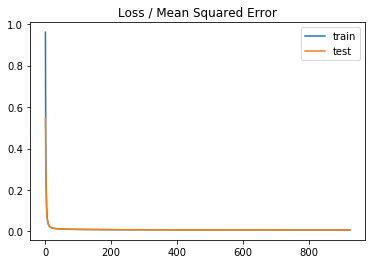

Training time is : 1.30  minute
1  out of  7
===================NN architecture==========================
=======================training=============================
Epoch 00709: early stopping
0.010702193371086506
24
========================Summary=============================
all value are in degree 
 the error mean is :  3.8981970161110318
 the error std is :  4.465119213935242
 the accuracy up to 0.1  degree is :  1.9541659264523008  %
 the accuracy up to 1    degree is :  20.59572452182152  %
 the accuracy up to 5    degree is :  74.09841890211405  %
 the accuracy up to 10    degree is :  92.63930834369634  %
MSE Train: 0.010 | MSE Test: 0.164 | MSE modifie Test: 0.011


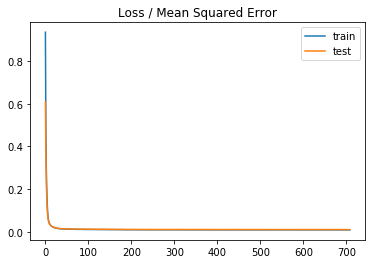

Training time is : 1.00  minute
2  out of  7
===================NN architecture==========================
=======================training=============================
Epoch 00491: early stopping
0.013587110935578621
27
========================Summary=============================
all value are in degree 
 the error mean is :  4.153258010877681
 the error std is :  5.230134253892193
 the accuracy up to 0.1  degree is :  1.995617930952804  %
 the accuracy up to 1    degree is :  20.323325635103924  %
 the accuracy up to 5    degree is :  73.2160833777462  %
 the accuracy up to 10    degree is :  92.42612660626519  %
MSE Train: 0.016 | MSE Test: 0.149 | MSE modifie Test: 0.014


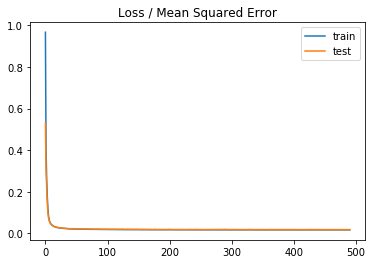

Training time is : 0.73  minute
3  out of  7
===================NN architecture==========================
=======================training=============================
Epoch 00786: early stopping
0.021926271025623244
31
========================Summary=============================
all value are in degree 
 the error mean is :  4.513234143728752
 the error std is :  7.184039367115911
 the accuracy up to 0.1  degree is :  2.1614259489548173  %
 the accuracy up to 1    degree is :  20.50689879789187  %
 the accuracy up to 5    degree is :  73.7786462959673  %
 the accuracy up to 10    degree is :  91.90501569254455  %
MSE Train: 0.026 | MSE Test: 0.134 | MSE modifie Test: 0.022


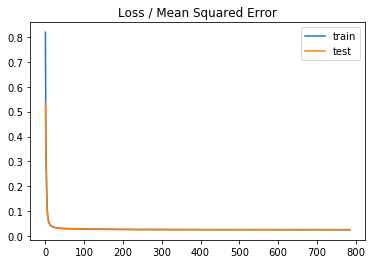

Training time is : 1.17  minute
4  out of  7
===================NN architecture==========================
=======================training=============================
Epoch 00628: early stopping
0.032970684180844555
42
========================Summary=============================
all value are in degree 
 the error mean is :  4.948516471241561
 the error std is :  9.151423719790053
 the accuracy up to 0.1  degree is :  1.9364007816663704  %
 the accuracy up to 1    degree is :  19.80221472138331  %
 the accuracy up to 5    degree is :  73.10357079410197  %
 the accuracy up to 10    degree is :  91.67999052525612  %
MSE Train: 0.035 | MSE Test: 0.109 | MSE modifie Test: 0.033


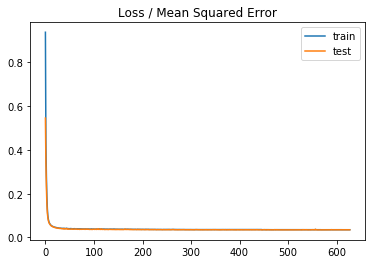

Training time is : 0.94  minute
5  out of  7
===================NN architecture==========================
=======================training=============================
Epoch 00494: early stopping
0.0420566624047505
38
========================Summary=============================
all value are in degree 
 the error mean is :  5.30463665901265
 the error std is :  10.48449878335816
 the accuracy up to 0.1  degree is :  1.983774501095517  %
 the accuracy up to 1    degree is :  19.79629300645467  %
 the accuracy up to 5    degree is :  72.45810386687985  %
 the accuracy up to 10    degree is :  91.46088707289631  %
MSE Train: 0.049 | MSE Test: 0.098 | MSE modifie Test: 0.042


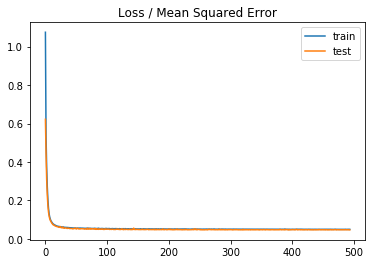

Training time is : 0.76  minute
6  out of  7
===================NN architecture==========================
=======================training=============================
Epoch 00414: early stopping
0.05723988970778322
34
========================Summary=============================
all value are in degree 
 the error mean is :  5.748497222875651
 the error std is :  12.44436654043673
 the accuracy up to 0.1  degree is :  2.0607567951678805  %
 the accuracy up to 1    degree is :  19.784449576597382  %
 the accuracy up to 5    degree is :  72.65944217445373  %
 the accuracy up to 10    degree is :  91.6089299461124  %
MSE Train: 0.062 | MSE Test: 0.086 | MSE modifie Test: 0.057


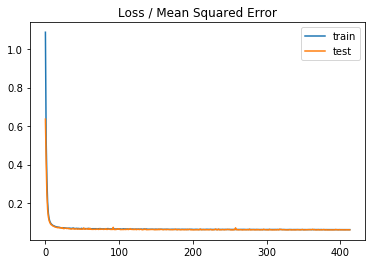

Training time is : 0.66  minute


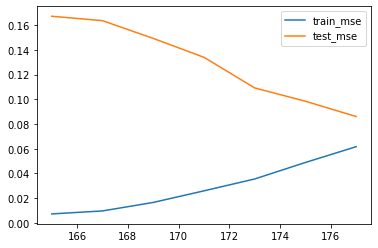

In [16]:
perfect_angle_test(build_model_3_tanh,X_train, X_test, Y_train, Y_test,angle_test)

0  out of  7
164.97418182269416
===================NN architecture==========================
=======================training=============================
Epoch 00622: early stopping
MSE Train: 0.008 | MSE Test: 0.363


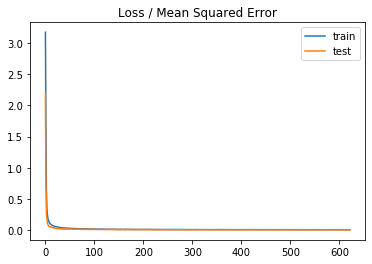

Training time is : 2.89  minute
1  out of  7
166.99427896882975
===================NN architecture==========================
=======================training=============================
Epoch 00415: early stopping
MSE Train: 0.013 | MSE Test: 0.304


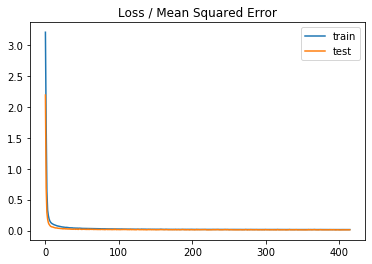

Training time is : 1.94  minute
2  out of  7
168.9824425179337
===================NN architecture==========================
=======================training=============================
Epoch 00649: early stopping
MSE Train: 0.019 | MSE Test: 0.238


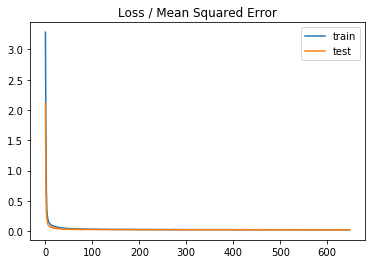

Training time is : 3.02  minute
3  out of  7
170.93695359662064
===================NN architecture==========================
=======================training=============================
Epoch 00786: early stopping
MSE Train: 0.026 | MSE Test: 0.182


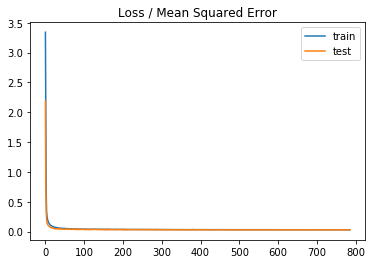

Training time is : 3.82  minute
4  out of  7
172.9702287720442
===================NN architecture==========================
=======================training=============================
Epoch 00519: early stopping
MSE Train: 0.037 | MSE Test: 0.148


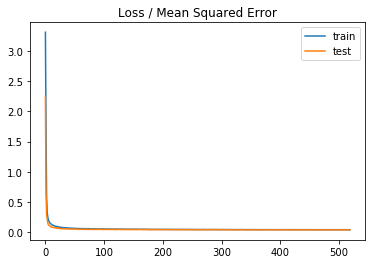

Training time is : 2.67  minute
5  out of  7
174.95906002265951
===================NN architecture==========================
=======================training=============================
Epoch 00457: early stopping
MSE Train: 0.053 | MSE Test: 0.122


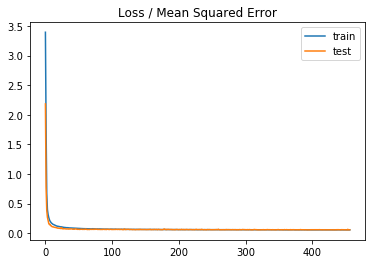

Training time is : 2.36  minute
6  out of  7
176.89498966869036
===================NN architecture==========================
=======================training=============================
Epoch 00466: early stopping
MSE Train: 0.065 | MSE Test: 0.096


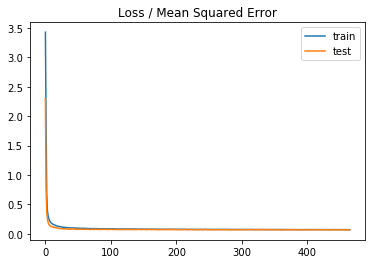

Training time is : 2.64  minute


ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

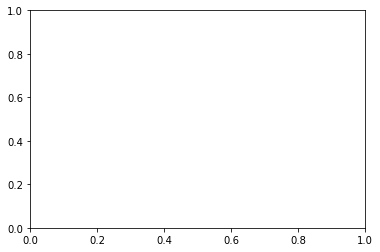

In [25]:
perfect_angle_test(build_model_3_tanh,X_train, X_test, Y_train, Y_test,angle_test)

0  out of  7
164.97418182269416
===================NN architecture==========================
=======================training=============================
Epoch 00683: early stopping
MSE Train: 0.008 | MSE Test: 0.008


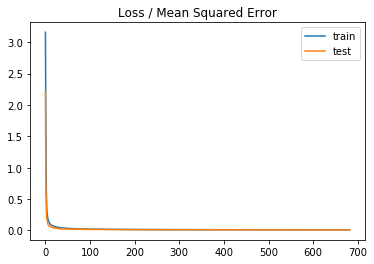

Training time is : 2.66  minute
0  out of  7
166.99427896882975
===================NN architecture==========================
=======================training=============================
Epoch 00301: early stopping
MSE Train: 0.012 | MSE Test: 0.011


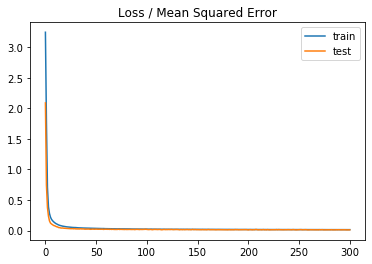

Training time is : 1.24  minute
0  out of  7
168.9824425179337
===================NN architecture==========================
=======================training=============================
Epoch 00807: early stopping
MSE Train: 0.018 | MSE Test: 0.018


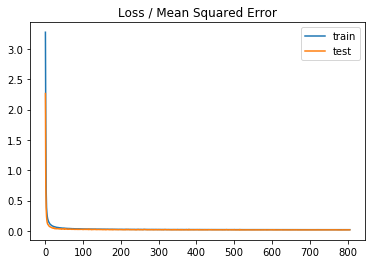

Training time is : 3.60  minute
0  out of  7
170.93695359662064
===================NN architecture==========================
=======================training=============================
Epoch 00362: early stopping
MSE Train: 0.028 | MSE Test: 0.026


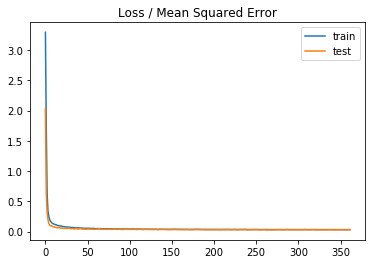

Training time is : 1.58  minute
0  out of  7
172.9702287720442
===================NN architecture==========================
=======================training=============================
Epoch 00378: early stopping
MSE Train: 0.036 | MSE Test: 0.040


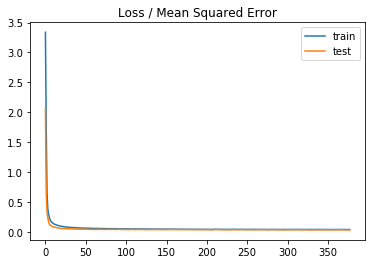

Training time is : 1.63  minute
0  out of  7
174.95906002265951
===================NN architecture==========================
=======================training=============================
Epoch 00755: early stopping
MSE Train: 0.049 | MSE Test: 0.055


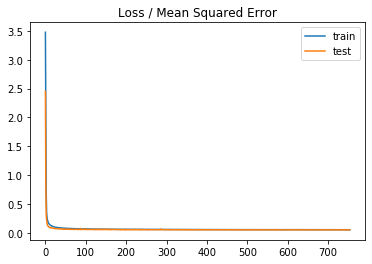

Training time is : 3.45  minute
0  out of  7
176.96374460410607
===================NN architecture==========================
=======================training=============================
Epoch 00517: early stopping
MSE Train: 0.062 | MSE Test: 0.073


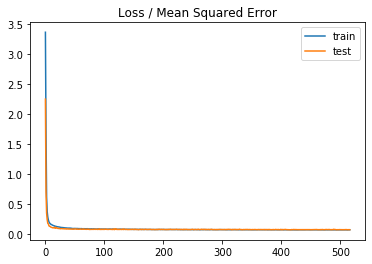

Training time is : 2.42  minute


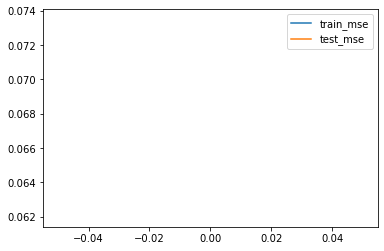

In [13]:
perfect_angle_test(build_model_3_tanh,X_train, X_test, Y_train, Y_test,angle_test)

In [8]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(40,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 41        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00132: early stopping
MSE Train: 0.720 | MSE Test: 0.723


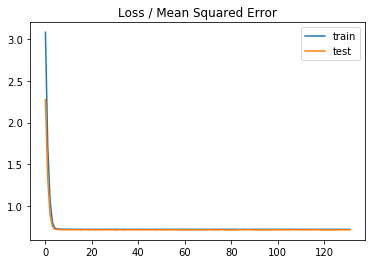

Training time is : 0.87  minute
======================Saving model==========================
Saved model to disk


In [9]:
model_base, train_mse , test_mse = training_NN(build_model_base_line,X_train, X_test, Y_train, Y_test,"model_bl_data_6.h5",batch=100)

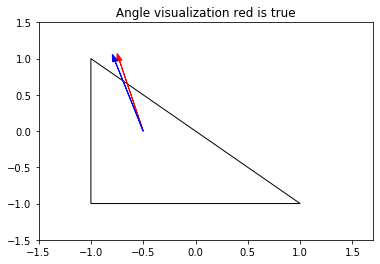

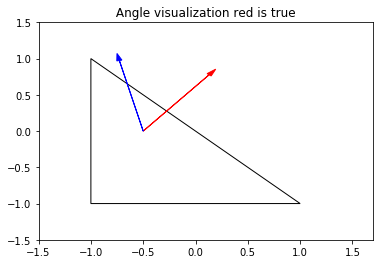

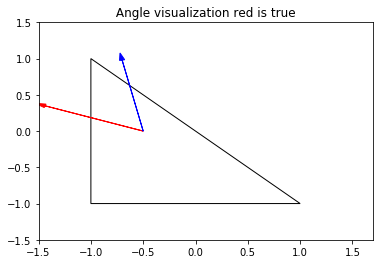

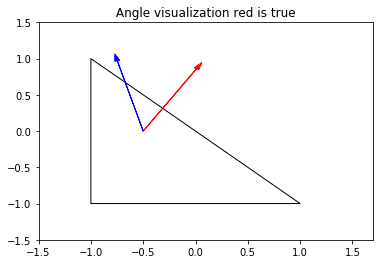

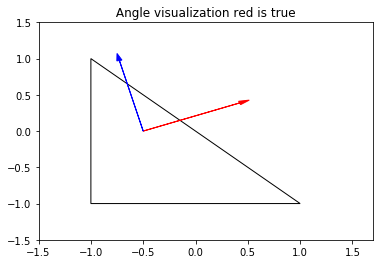

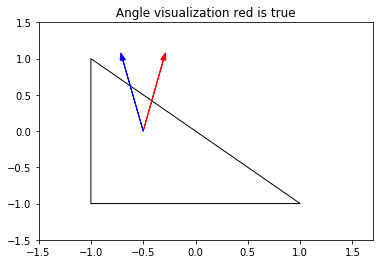

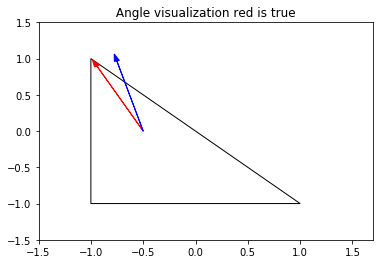

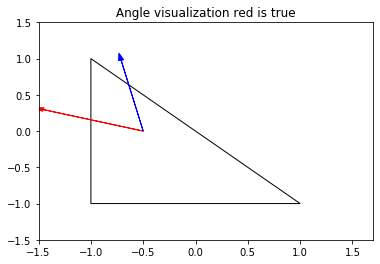

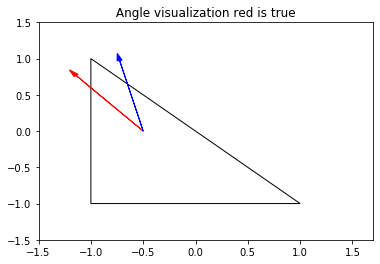

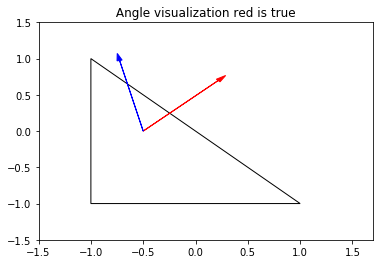

In [10]:
angle_visualization(model_base , X_test , Y_test)

In [34]:
indice_train  = np.where(Y_train*180/np.pi < 165)[0]
X_train_re = X_train[indice_train]
y_train_re = Y_train[indice_train]

===================NN architecture==========================
=======================training=============================
Epoch 00658: early stopping
MSE Train: 0.008 | MSE Test: 0.184


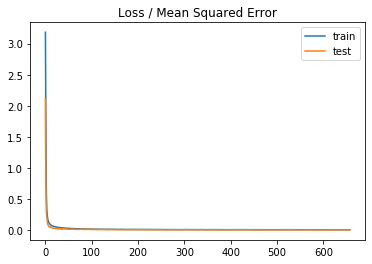

Training time is : 3.44  minute
======================Saving model==========================
Saved model to disk


In [35]:
model_3_tanh, train_mse , test_mse = training_NN(build_model_3_tanh,X_train_re, X_test, y_train_re, Y_test,"test.h5",batch = 1000)

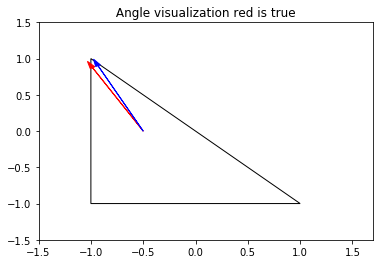

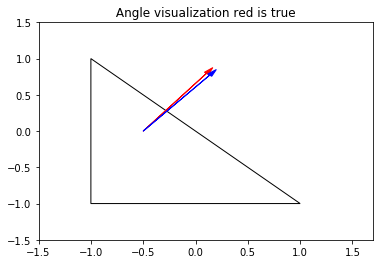

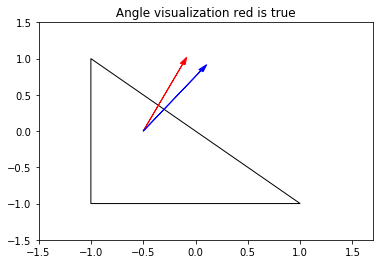

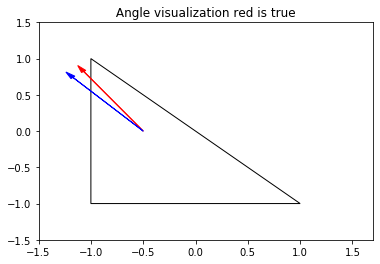

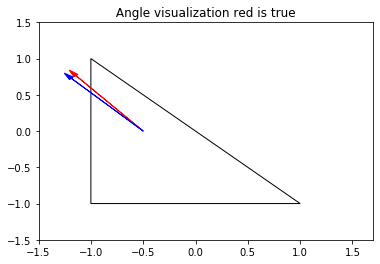

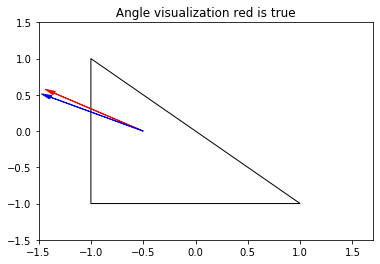

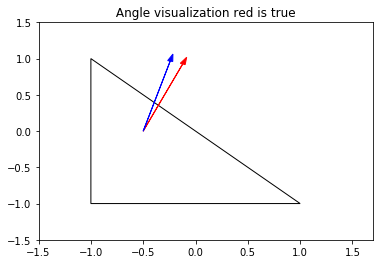

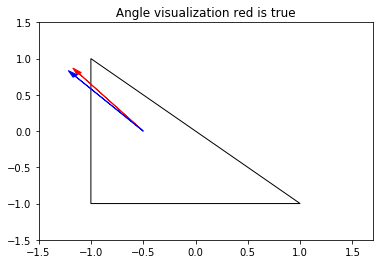

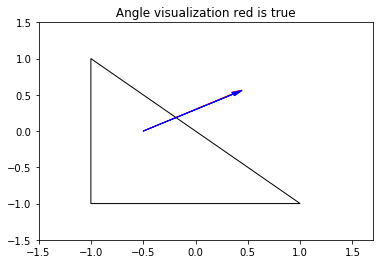

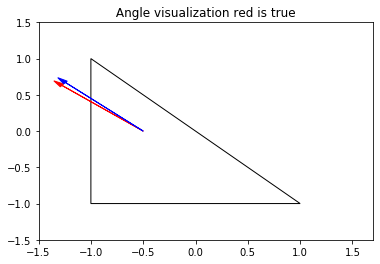

In [23]:
angle_visualization(model_3_tanh , X_test , Y_test)

### Analyse of the problem


In [42]:
Y_hat =  model_3_tanh.predict(X_test, verbose=0)

In [43]:
error = np.mean((Y_hat-Y_test)**2)
print(error)

0.18394859458985321


In [26]:
indice = np.where(np.abs(error) >=1)[0]
print(indice.shape[0])

242


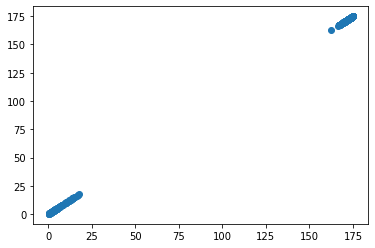

In [27]:
plt.scatter(Y_test[indice]*180/np.pi,Y_test[indice]*180/np.pi)

we can see that the model strugle with the angle in the reference element that is near zero or near pi 

the location of the discontinuity is really often in the top of the triangle. their is only horizontal discontinuity


In [15]:
X_test[indice[10]]

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0.])

In [18]:
max_ = (np.where(Y_test[indice]*180/np.pi>150)[0]).shape[0]
n=0
for i in indice :
    if Y_test[i]*180/np.pi > 150 :
        if i in ind_neg_x_test:
            n +=1
print(max_)
print(n)
        

180
79


In [19]:
max_ = (np.where(Y_test[indice]*180/np.pi<150)[0]).shape[0]
n=0
for i in indice :
    if Y_test[i]*180/np.pi < 150 :
        if i in ind_neg_x_test:
            n +=1
print(max_)
print(n)

184
98


The problem come from the fact that if we have an horizontak discontinuity in the reference element then their is multipole interpretation and the NN is lost .

let's try to see if i have wrigth. we will take wlog that an horizontal discontinuity is define by an angle of zero

In [31]:
indice_up_170 = np.where(Y_train*180/np.pi > 170)[0]
Y_train_new = np.copy(Y_train)
Y_train_new[indice_up_170] -= np.pi

In [32]:
indice_up_170 = np.where(Y_test*180/np.pi > 170)[0]
Y_test_new = np.copy(Y_test)
Y_test_new[indice_up_170] -= np.pi


===================NN architecture==========================
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 40)                160       
_________________________________________________________________
activation_4 (Activation)    (None, 40)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 40)                160       
___________________________________________________________

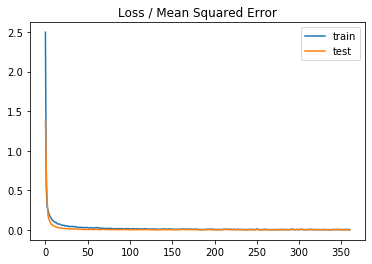

Training time is : 0.64  minute
======================Saving model==========================
Saved model to disk


In [33]:
model_fix , train_mse , test_mse = training_NN(build_model_3_tanh,X_train, X_test, Y_train_new, Y_test_new,"test.h5",batch = 100)

### Making prediction :

In [8]:
from keras.models import load_model
model_3_tanh = load_model('test.h5')

In [20]:
data_path_test_1 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_30.csv'

In [21]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30.csv',model_3_tanh,normalized=True,threshold = 175,similarity=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0444
saving prediction ...
saving succed


In [40]:
data_path_test_2 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_60.csv'

loading data ... 
loading succed
on a new mesh the mse is : 1.0820


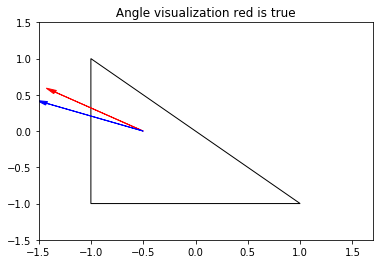

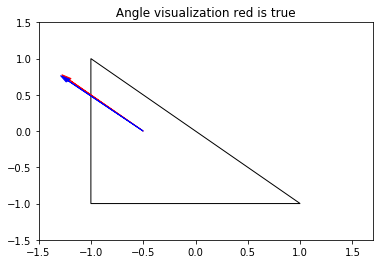

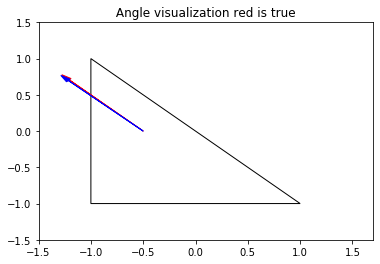

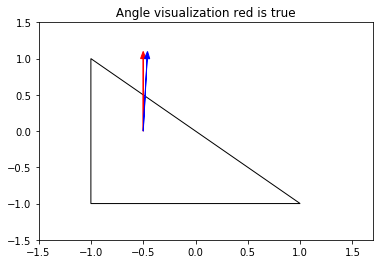

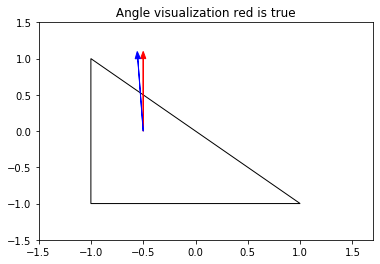

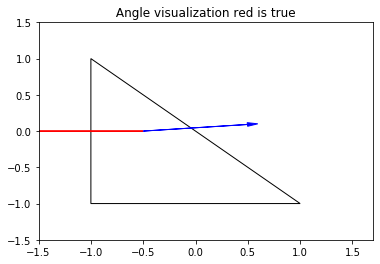

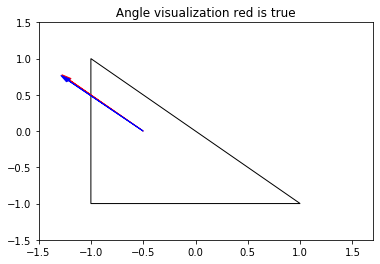

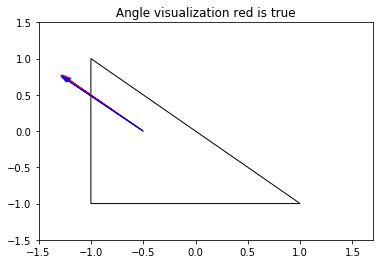

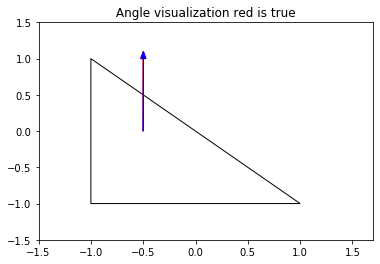

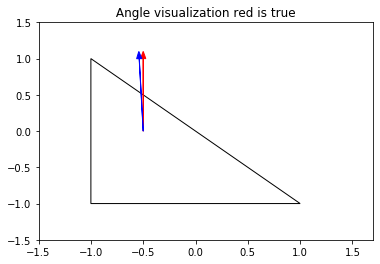

saving prediction ...
saving succed


In [41]:
test_mse  = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60.csv',model_3_tanh,vizu = True ,normalized=True)

In [80]:
# load the data 
data = np.loadtxt(data_path_test_2, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(198, 41)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7793197b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c779319e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c779319390>],
 'medians': [<matplotlib.lines.Line2D at 0x1c779327518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c779327860>],
 'means': []}

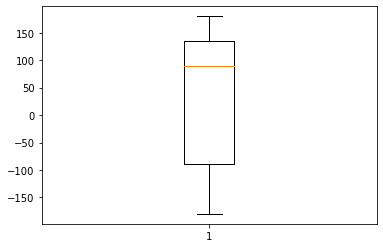

In [61]:
plt.boxplot(data[:,-1]*180/np.pi)

In [21]:
data_path_test_3 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_90.csv'

In [22]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90.csv',model_3_tanh,normalized=True,threshold = 175,similarity=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0066
saving prediction ...
saving succed


In [38]:
data_path_test_4 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_circle.csv'

In [39]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


#### trying to predict with model C

In [30]:
from keras.models import load_model
model_C = load_model('model_3_tanh_data_C_3.h5')

In [31]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0095
saving prediction ...
saving succed


In [32]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.7507
saving prediction ...
saving succed


In [33]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0036
saving prediction ...
saving succed


In [34]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


### trying to predict with model A

In [36]:
from keras.models import load_model
model_A = load_model('model_3_tanh_data_3.h5')

In [37]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0310
saving prediction ...
saving succed


In [38]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.8226
saving prediction ...
saving succed


In [39]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0291
saving prediction ...
saving succed


In [40]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


In [41]:
from keras.models import load_model
model_all = load_model('model_all_mesh.h5')

In [42]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_ALL.csv',model_all,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.3193
saving prediction ...
saving succed
